In [1]:
import glob
import os
from math import sqrt

import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt


def get_calibration_angle(file_name):
    return file_name.split("_")[-2]


d = {
    "222": 1.177e-10,
    "113": 1.230e-10,
    "022": 1.442e-10,
    "002": 2.039e-10,
    "111": 2.355e-10,
    "211": 1.67e-10,
    "004": 1.03e-10,
    "110": 2.87e-10
}

U = 100e3
e = 1.60217e-19
c = 2.997e8
h = 6.61e-34
me = 9.109e-31

lambda_e = h * c / sqrt((e * U) ** 2 + 2 * e * U * me * c ** 2)

half_angles = {
    k: np.arcsin(lambda_e / v / 2) * 1000 * 2 for k, v in d.items()
}

images = glob.glob("./data/images/*.tiff")



calibrations = {
    file_name: float(get_calibration_angle(file_name)) for file_name in images
}

half_angles

{'222': 31.37288534329021,
 '113': 30.02094174286058,
 '022': 25.607060032258847,
 '002': 18.109306653187147,
 '111': 15.679299338225357,
 '211': 22.110852625606935,
 '004': 35.850824475054246,
 '110': 12.865723476076798}

In [51]:
image = cv2.imread(images[100], cv2.IMREAD_UNCHANGED)
image_processed = cv2.Laplacian(image, ddepth=cv2.CV_16U, ksize=3)

calibration = calibrations[images[100]]
mesh_x, mesh_y = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]))

center_x = np.round(np.sum(mesh_x * image) / np.sum(image))
center_y = np.round(np.sum(mesh_y * image) / np.sum(image))


for k, v in half_angles.items():
    probable_radius = image.shape[0] / calibration * v
    probable_radius_int = int(probable_radius)
    search_radius = np.arange(start=probable_radius_int - 2, stop=probable_radius_int + 3)
    
    for radius in search_radius:
        mask = np.zeros_like(image)
        mask = cv2.circle(mask, (int(center_x), int(center_y)), int(radius), color=1, thickness=1)
        counter = np.mean(image_processed[mask == 1])
        print(f"Orientation {k}: Radius: {radius}, counter: {counter}, m: {np.sum(mask)}")
        

Orientation 222: Radius: 120, counter: 122.47928994082841, m: 676
Orientation 222: Radius: 121, counter: 110.45906432748538, m: 684
Orientation 222: Radius: 122, counter: 111.44767441860465, m: 688
Orientation 222: Radius: 123, counter: 107.8728323699422, m: 692
Orientation 222: Radius: 124, counter: 127.45142857142856, m: 700
Orientation 113: Radius: 115, counter: 100.37654320987654, m: 648
Orientation 113: Radius: 116, counter: 65.52743902439025, m: 656
Orientation 113: Radius: 117, counter: 74.98484848484848, m: 660
Orientation 113: Radius: 118, counter: 124.20180722891567, m: 664
Orientation 113: Radius: 119, counter: 131.54761904761904, m: 672
Orientation 022: Radius: 97, counter: 155.32116788321167, m: 548
Orientation 022: Radius: 98, counter: 158.55434782608697, m: 552
Orientation 022: Radius: 99, counter: 133.98928571428573, m: 560
Orientation 022: Radius: 100, counter: 119.87588652482269, m: 564
Orientation 022: Radius: 101, counter: 193.27464788732394, m: 568
Orientation 002:

array([[  0,   1,   2, ..., 511, 512, 513],
       [  0,   1,   2, ..., 511, 512, 513],
       [  0,   1,   2, ..., 511, 512, 513],
       ...,
       [  0,   1,   2, ..., 511, 512, 513],
       [  0,   1,   2, ..., 511, 512, 513],
       [  0,   1,   2, ..., 511, 512, 513]])

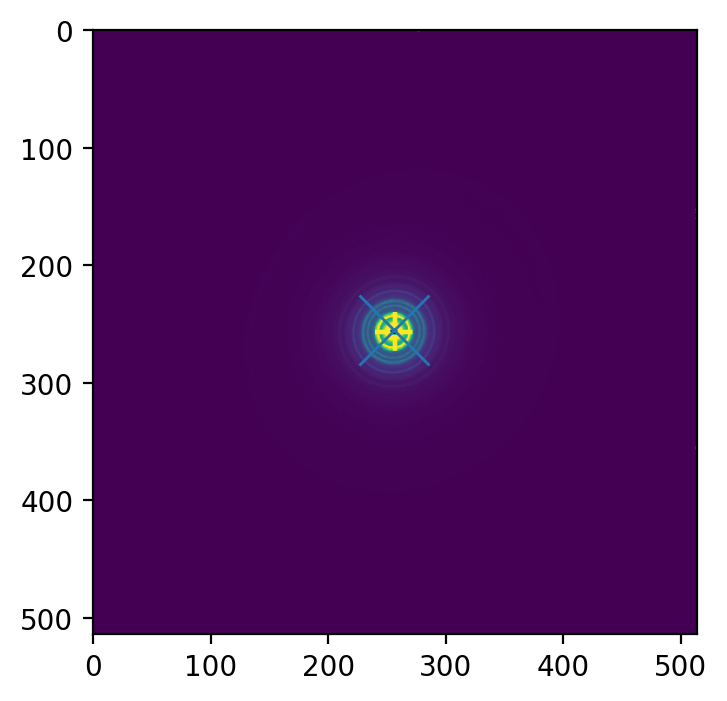

In [33]:
plt.figure(dpi=200)
plt.imshow(image)
plt.plot(center_x - 1, center_y-1, "x",markersize=25)
plt.show()